# Battle of the neighborhoods : Shifting

### In this project we will find the locality which is similar to a given neighborhood. The neighborhoods are compared based on the top 10 common features of the locality

### imporing the required libraries

In [1]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

import matplotlib.pyplot as plt
    
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                       

In [13]:
import requests

### Details of Foursquare API

In [43]:
CLIENT_ID = 'SC1VZRWR4BJ1FX5SFAW2BLRIN01SXBMGLQIJXKZZ22BLMG4C' # your Foursquare ID
CLIENT_SECRET = 'ACT6HJVIJZUX4JIDWKAAKCOGFUUMUION5RMYQHCVJUJXTI1W' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

### Extracting the data from wikipedia about different community boards in New York

In [3]:
ny_data_not_cleaned= pd.read_html('https://en.wikipedia.org/wiki/Neighborhoods_in_New_York_City')
ny_data= ny_data_not_cleaned[0]
ny_data.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods
0,Bronx CB 1,7.17,91497,12761,"Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,5.54,52246,9792,"Hunts Point, Longwood"
2,Bronx CB 3,4.07,79762,19598,"Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,5.28,146441,27735,"Concourse, Highbridge"
4,Bronx CB 5,3.55,128200,36145,"Fordham, Morris Heights, Mount Hope, Universit..."


### Removing non-breaking space from the community boards names 

In [4]:
for index,row in ny_data.iterrows():
    name_list= list(map(str,row['Community Board(CB)'].split()))
    name= ' '.join(name_list)
    ny_data.loc[index,'Community Board(CB)']=name

ny_data.head()

,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods
0,Bronx CB 1,7.17,91497,12761,"Melrose, Mott Haven, Port Morris"
1,Bronx CB 2,5.54,52246,9792,"Hunts Point, Longwood"
2,Bronx CB 3,4.07,79762,19598,"Claremont, Concourse Village, Crotona Park, Mo..."
3,Bronx CB 4,5.28,146441,27735,"Concourse, Highbridge"
4,Bronx CB 5,3.55,128200,36145,"Fordham, Morris Heights, Mount Hope, Universit..."


### Longitudes and Latitudes of different community boards in Bronx, Brooklyn, Manhattan, Queens and Statten Island respectively

In [5]:
longitude=[73.9132,73.8921,73.9909,73.9101,73.9105,73.8928,73.8850 ,73.865433,73.8571,73.8342,73.8562,73.8592]

latitude = [40.8197,40.8211,40.7270,40.8434,40.8568,40.8458,40.8747,40.837048,40.8234,40.8374,40.8477,40.8909]

In [6]:
long_1=[73.997002,73.9879,73.9466,73.9094,73.9907,73.94958,74.0079,73.9138,73.949997,74.0244,73.9138,73.9984,73.9798,73.9615,73.949997,73.9141,73.9373,73.94958]
lat_1=[40.706001,40.6936,40.6800,40.6842,40.7514,40.6501,40.6505,40.6999,40.650002,40.6244,40.6999,40.6293,40.5757,40.6297,40.650002,40.6698,40.6367,40.6501]

In [7]:
long_2=[74.0037,73.9980,73.9909,73.9916,73.9907,73.9732,73.9765,73.9693,73.9573,73.985130,73.9428,73.9396   ]
lat_2=[40.7129,40.7278,40.7270,40.7576,40.7514,40.7513,40.7891,40.7630,40.8156,40.758896,40.8003 ,40.8392  ]

In [8]:
long_3 =[73.9029,73.9150,73.8839,73.8594,73.8933,73.8488,73.8300,73.7651,73.8287,73.81957,73.9428,73.7991,73.90852322183609,73.7527  ]
lat_3=[40.7705,40.7438,40.7500,40.7461,40.7011,40.7103,40.7571,40.7187,40.7139,40.676873,40.8003,40.7045,40.76505738563953,40.6040 ]

In [9]:
long_4 =[74.151535 ,74.1727,74.2067,74.0060  ]
lat_4=[ 40.579021,40.6170,40.5430,40.7128   ]

#### Changing the signs of the longitudes from + ve to - ve

In [10]:
long_4 = [x * -1 for x in long_4]
long_3 = [x * -1 for x in long_3]
long_2 = [x * -1 for x in long_2]
long_1 = [x * -1 for x in long_1]
longitude = [x * -1 for x in longitude]

### Adding the coordinates to ny_data

In [11]:
lat_all =[]
long_all =[]

lat_all.extend(latitude)
lat_all.extend(lat_1)
lat_all.extend(lat_2)
lat_all.extend(lat_3)
lat_all.extend(lat_4)

long_all.extend(longitude)
long_all.extend(long_1)
long_all.extend(long_2)
long_all.extend(long_3)
long_all.extend(long_4)


In [12]:
ny_data['Latitudes']=lat_all
ny_data['Longitudes']=long_all

ny_data.drop(59,inplace=True)
ny_data.head()



,Community Board(CB),Areakm2,Pop.Census2010,Pop./km2,Neighborhoods,Latitudes,Longitudes
0,Bronx CB 1,7.17,91497,12761,"Melrose, Mott Haven, Port Morris",40.8197,-73.9132
1,Bronx CB 2,5.54,52246,9792,"Hunts Point, Longwood",40.8211,-73.8921
2,Bronx CB 3,4.07,79762,19598,"Claremont, Concourse Village, Crotona Park, Mo...",40.7270,-73.9909
3,Bronx CB 4,5.28,146441,27735,"Concourse, Highbridge",40.8434,-73.9101
4,Bronx CB 5,3.55,128200,36145,"Fordham, Morris Heights, Mount Hope, Universit...",40.8568,-73.9105


### Getting the venues in the community bases

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000,LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
ny_venues = getNearbyVenues(names=ny_data['Community Board(CB)'],
                                   latitudes=ny_data['Latitudes'],
                                   longitudes=ny_data['Longitudes']
                                  )

Bronx CB 1
Bronx CB 2
Bronx CB 3
Bronx CB 4
Bronx CB 5
Bronx CB 6
Bronx CB 7
Bronx CB 8
Bronx CB 9
Bronx CB 10
Bronx CB 11
Bronx CB 12
Brooklyn CB 1
Brooklyn CB 2
Brooklyn CB 3
Brooklyn CB 4
Brooklyn CB 5
Brooklyn CB 6
Brooklyn CB 7
Brooklyn CB 8
Brooklyn CB 9
Brooklyn CB 10
Brooklyn CB 11
Brooklyn CB 12
Brooklyn CB 13
Brooklyn CB 14
Brooklyn CB 15
Brooklyn CB 16
Brooklyn CB 17
Brooklyn CB 18
Manhattan CB 1
Manhattan CB 2
Manhattan CB 3
Manhattan CB 4
Manhattan CB 5
Manhattan CB 6
Manhattan CB 7
Manhattan CB 8
Manhattan CB 9
Manhattan CB 10
Manhattan CB 11
Manhattan CB 12
Queens CB 1
Queens CB 2
Queens CB 3
Queens CB 4
Queens CB 5
Queens CB 6
Queens CB 7
Queens CB 8
Queens CB 9
Queens CB 10
Queens CB 11
Queens CB 12
Queens CB 13
Queens CB 14
Staten Island CB 1
Staten Island CB 2
Staten Island CB 3


In [16]:
print(ny_venues.shape)
ny_venues.head()

(4943, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx CB 1,40.8197,-73.9132,Landin Mac & Cheese,40.820028,-73.915886,Mac & Cheese Joint
1,Bronx CB 1,40.8197,-73.9132,Xochimilco Family Restaurant,40.818735,-73.916650,Mexican Restaurant
2,Bronx CB 1,40.8197,-73.9132,Blink Fitness,40.819348,-73.910373,Gym / Fitness Center
3,Bronx CB 1,40.8197,-73.9132,Senshi Okami Martial Arts Center,40.819295,-73.914158,Martial Arts Dojo
4,Bronx CB 1,40.8197,-73.9132,Bronx Documentary Center,40.818003,-73.918864,Art Gallery


### Grouping the locations and counting the number of each kind of locations

In [17]:
ny_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bronx CB 1,100,100,100,100,100,100
Bronx CB 10,79,79,79,79,79,79
Bronx CB 11,77,77,77,77,77,77
Bronx CB 12,62,62,62,62,62,62
Bronx CB 2,68,68,68,68,68,68
Bronx CB 3,100,100,100,100,100,100
Bronx CB 4,54,54,54,54,54,54
Bronx CB 5,90,90,90,90,90,90
Bronx CB 6,76,76,76,76,76,76


In [18]:
# one hot encoding
ny_onehot = pd.get_dummies(ny_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ny_onehot['Neighborhood'] = ny_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [ny_onehot.columns[-1]] + list(ny_onehot.columns[:-1])
ny_onehot = ny_onehot[fixed_columns]

ny_onehot.head()

,Zoo,African Restaurant,Airport Tram,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,...,Vietnamese Restaurant,Voting Booth,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
ny_grouped = ny_onehot.groupby('Neighborhood').sum().reset_index()
ny_grouped.head()

,Neighborhood,Zoo,African Restaurant,Airport Tram,American Restaurant,Amphitheater,Antique Shop,Aquarium,Arcade,Arepa Restaurant,...,Vietnamese Restaurant,Voting Booth,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yemeni Restaurant,Yoga Studio
0,Bronx CB 1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bronx CB 10,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Bronx CB 11,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Bronx CB 12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bronx CB 2,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Extracting the top ten venues of each locality

In [20]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = ny_grouped['Neighborhood']

for ind in np.arange(ny_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ny_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx CB 1,Mexican Restaurant,Pizza Place,Sandwich Place,Grocery Store,Donut Shop,Gym,Pharmacy,Fast Food Restaurant,Kids Store,Mobile Phone Shop
1,Bronx CB 10,Pizza Place,Bar,Pharmacy,Fast Food Restaurant,Donut Shop,Italian Restaurant,Bakery,Sandwich Place,American Restaurant,Diner
2,Bronx CB 11,Pizza Place,Italian Restaurant,Deli / Bodega,Sandwich Place,Coffee Shop,Donut Shop,Pharmacy,Bank,Supermarket,Burger Joint
3,Bronx CB 12,Caribbean Restaurant,Pharmacy,Bakery,Pizza Place,Fast Food Restaurant,Deli / Bodega,Donut Shop,Mobile Phone Shop,Supermarket,Gas Station
4,Bronx CB 2,Fast Food Restaurant,Pharmacy,Pizza Place,Grocery Store,Deli / Bodega,Donut Shop,Discount Store,Park,Sandwich Place,Mobile Phone Shop


### Giving the dataframe a simpler name 

In [22]:
ny = neighborhoods_venues_sorted.copy()

### Finding the similarity of different locality

##### The index calculation process is as follows

The top 10 venues of the known locality are given values from 10 -> 1,ie, the most common venue will get a value 10, and the 10th most common venue will get a value 1.

The some thing will be done to the locality to which we are comparing the known locality.

If one of the ten venues of the known locality matches with a certain venue of the other locality, the values assigned to them are multiplied together.

All those multiplied results are added together, which gives us the total score.

For example,
Let's compare Bronx CB 1 to Bronx CB 12, where Bronx CB 1 is the known locality and Bronx CB 12 is the unknown locality.

By the first statement-

Mexican Restaurant=10 ,	Pizza Place=9 , 	Sandwich Place=8 , 	Grocery Store=7, 	Donut Shop=6, 	Gym=5 , 	Pharmacy=4, 	Fast Food Restaurant=3, 	Kids Store=2, 	Mobile Phone Shop=1

By the second statement-

Caribbean Restaurant=10,	Pharmacy=9, 	Bakery=8, 	Pizza Place=7, 	Fast Food Restaurant=6, 	Deli / Bodega=5, 	Donut Shop=4, 	Mobile Phone Shop=3, 	Supermarket=2, 	Gas Station=1

By statement three we get- 

10x0 + 9x7 + 8x0 + 7x0 + 6x4 + 5x0 + 4x9 + 3x6 + 2x0 + 1x3 = 144

The highest score is 385.


In [23]:
def check_similarity(ind):
    similarity=[]
    
    for index, row in ny.iterrows():
        score=0
        temp=[]
        
        for i in range(1,11):
            for j in range(1,11):
                if ny.iloc[ind,i]==row[j]:
                    score+=(11-i)*(11-j)
                    
        temp=[row['Neighborhood'],score]
        similarity.append(temp)
        
    return similarity


### Getting the simlarity score of 'Bronx CB 4' with respect to other community boards

In [24]:
place="Bronx CB 4"
index_place=0
for index, row in ny.iterrows():
    if row['Neighborhood']==place:
        index_place+=index
        break
        
print(index_place)

similarity = check_similarity(index_place)

6


In [25]:
similarity_index = pd.DataFrame(similarity[:],columns=['locality','similarity'])
similarity_index =similarity_index.sort_values('similarity',ascending=False)
similarity_index.reset_index(drop=True,inplace=True)
similarity_index

,locality,similarity
0,Bronx CB 4,385
1,Bronx CB 2,305
2,Bronx CB 5,271
3,Bronx CB 1,231
4,Bronx CB 10,224
5,Bronx CB 9,215
6,Bronx CB 6,213
7,Bronx CB 12,184
8,Brooklyn CB 6,178
9,Brooklyn CB 18,178


### Adding the latitudes and longitudes to get the map

In [26]:
lat=[]
long=[]
for j, row_1 in similarity_index.iterrows():
    for index,row in ny_data.iterrows():
        if row['Community Board(CB)']==row_1['locality']:
            lat.append(row['Latitudes'])
            long.append(row['Longitudes'])
            
similarity_index['Latitude']=lat
similarity_index['Longitude']=long

similarity_index.head()


,locality,similarity,Latitude,Longitude
0,Bronx CB 4,385,40.8434,-73.9101
1,Bronx CB 2,305,40.8211,-73.8921
2,Bronx CB 5,271,40.8568,-73.9105
3,Bronx CB 1,231,40.8197,-73.9132
4,Bronx CB 10,224,40.8374,-73.8342


### Generating the Map
#### The pop-up on pressing a point will show the score followed by the community board name

In [27]:
latitude=40.7128
longitude=-74.0060

map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, score in zip(similarity_index['Latitude'], similarity_index['Longitude'], similarity_index['locality'], similarity_index['similarity']):
    list_name=list(map(str,borough.split()))
    #print(list_name)
    name=' '.join(list_name)
    
    label = '{}, {}'.format(score, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

#### Generating a histogram to get a better idea of the distribution of score

(array([16., 14., 11., 11.,  4.,  1.,  1.,  1.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 385]),
 <a list of 8 Patch objects>)

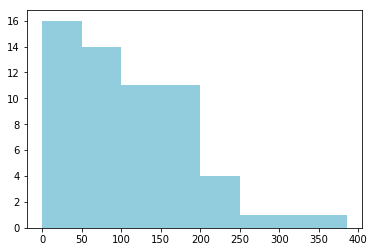

In [28]:
plt.hist(similarity_index['similarity'],bins=[0,50,100,150,200,250,300,350,385],color='#91CDDD')

### Creating an new known locality and adding it to the dataframe

In [29]:
a_row = ['Kolkata part 1','Pharmacy','Fast Food Restaurant','Grocery Store','Indian Restaurant','Tea store','Bakery','Discount Store','Park','Sandwich Place','Mobile Phone Shop']
row_df = pd.DataFrame([a_row],columns=['Neighborhood','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue'])

In [31]:
new_df=ny.copy()
new_df = new_df.append(row_df,ignore_index=True)

ny=new_df.copy()
ny

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx CB 1,Mexican Restaurant,Pizza Place,Sandwich Place,Grocery Store,Donut Shop,Gym,Pharmacy,Fast Food Restaurant,Kids Store,Mobile Phone Shop
1,Bronx CB 10,Pizza Place,Bar,Pharmacy,Fast Food Restaurant,Donut Shop,Italian Restaurant,Bakery,Sandwich Place,American Restaurant,Diner
2,Bronx CB 11,Pizza Place,Italian Restaurant,Deli / Bodega,Sandwich Place,Coffee Shop,Donut Shop,Pharmacy,Bank,Supermarket,Burger Joint
3,Bronx CB 12,Caribbean Restaurant,Pharmacy,Bakery,Pizza Place,Fast Food Restaurant,Deli / Bodega,Donut Shop,Mobile Phone Shop,Supermarket,Gas Station
4,Bronx CB 2,Fast Food Restaurant,Pharmacy,Pizza Place,Grocery Store,Deli / Bodega,Donut Shop,Discount Store,Park,Sandwich Place,Mobile Phone Shop
5,Bronx CB 3,Italian Restaurant,Pizza Place,Gym,Coffee Shop,Bookstore,Japanese Restaurant,Juice Bar,Grocery Store,Hotel,Cosmetics Shop
6,Bronx CB 4,Grocery Store,Fast Food Restaurant,Pizza Place,Fried Chicken Joint,Pharmacy,Donut Shop,Spanish Restaurant,Ice Cream Shop,Bank,Sandwich Place
7,Bronx CB 5,Grocery Store,Pizza Place,Chinese Restaurant,Fried Chicken Joint,Donut Shop,Latin American Restaurant,Spanish Restaurant,Mexican Restaurant,Bank,Liquor Store
8,Bronx CB 6,Italian Restaurant,Donut Shop,Pizza Place,Fast Food Restaurant,Park,Fried Chicken Joint,Café,Chinese Restaurant,Discount Store,Pharmacy
9,Bronx CB 7,Pizza Place,Deli / Bodega,Chinese Restaurant,Pharmacy,Park,Bank,Sandwich Place,Mexican Restaurant,Diner,Donut Shop


### Considering 'Kolkata part 1' as known place and calculating the similarity with the localities in New York

In [32]:
place="Kolkata part 1"
index_place=0
for index, row in ny.iterrows():
    if row['Neighborhood']==place:
        index_place+=index
        break
        
print(index_place)

similarity = check_similarity(index_place)

59


In [33]:
kol_index = pd.DataFrame(similarity[:],columns=['locality','similarity'])
kol_index =kol_index.sort_values('similarity',ascending=False)
kol_index.reset_index(drop=True,inplace=True)
kol_index

,locality,similarity
0,Kolkata part 1,385
1,Bronx CB 2,266
2,Bronx CB 4,223
3,Bronx CB 12,187
4,Bronx CB 10,169
5,Bronx CB 1,140
6,Brooklyn CB 12,132
7,Brooklyn CB 18,123
8,Brooklyn CB 6,123
9,Brooklyn CB 9,116


In [34]:
lat=[22.5726]
long=[88.3639]
for j, row_1 in kol_index.iterrows():
    for index,row in ny_data.iterrows():
        if row['Community Board(CB)']==row_1['locality']:
            lat.append(row['Latitudes'])
            long.append(row['Longitudes'])



            
kol_index['Latitude']=lat
kol_index['Longitude']=long

kol_index.head()


,locality,similarity,Latitude,Longitude
0,Kolkata part 1,385,22.5726,88.3639
1,Bronx CB 2,266,40.8211,-73.8921
2,Bronx CB 4,223,40.8434,-73.9101
3,Bronx CB 12,187,40.8909,-73.8592
4,Bronx CB 10,169,40.8374,-73.8342


### Making a histogram to understand the distribution of the score

(array([29., 18.,  8.,  2.,  1.,  1.,  0.,  1.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 385]),
 <a list of 8 Patch objects>)

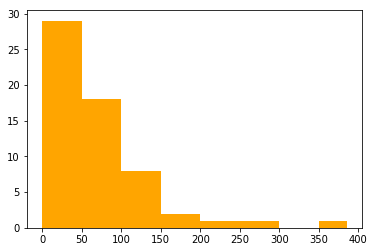

In [35]:
plt.hist(kol_index['similarity'],bins=[0,50,100,150,200,250,300,350,385],color='orange')

### Showing the localities on the map

In [36]:
latitude=40.7128
longitude=-74.0060

map_newyork_1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, score in zip(kol_index['Latitude'], kol_index['Longitude'], kol_index['locality'], kol_index['similarity']):
    list_name=list(map(str,borough.split()))
    #print(list_name)
    name=' '.join(list_name)
    
    label = '{}, {}'.format(score, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_1)  
    
map_newyork_1


### Considering 'Manhattan CB 10' as the known locality

In [37]:
place="Manhattan CB 10"
index_place=0
for index, row in ny.iterrows():
    if row['Neighborhood']==place:
        index_place+=index
        break
        
print(index_place)

similarity = check_similarity(index_place)


31


In [38]:
man_index = pd.DataFrame(similarity[:],columns=['locality','similarity'])
man_index =man_index.sort_values('similarity',ascending=False)
man_index.reset_index(drop=True,inplace=True)
man_index

,locality,similarity
0,Manhattan CB 10,385
1,Manhattan CB 5,237
2,Brooklyn CB 5,237
3,Manhattan CB 4,211
4,Manhattan CB 8,179
5,Manhattan CB 1,177
6,Manhattan CB 6,156
7,Manhattan CB 2,138
8,Manhattan CB 3,123
9,Bronx CB 3,123


In [40]:
lat=[]
long=[]
count=0

for j, row_1 in man_index.iterrows():
    for index,row in ny_data.iterrows():
        if row['Community Board(CB)']==row_1['locality']:
            lat.append(row['Latitudes'])
            long.append(row['Longitudes'])
        if count==0:
            if row_1['locality']=='Kolkata part 1':
                lat.append(22.5726)
                long.append(88.3639)
                count+=1

            
man_index['Latitude']=lat
man_index['Longitude']=long

man_index.head()

,locality,similarity,Latitude,Longitude
0,Manhattan CB 10,385,40.758896,-73.98513
1,Manhattan CB 5,237,40.751400,-73.99070
2,Brooklyn CB 5,237,40.751400,-73.99070
3,Manhattan CB 4,211,40.757600,-73.99160
4,Manhattan CB 8,179,40.763000,-73.96930


#### Making the histogram to get a better understanding of the distribution of the score

(array([37.,  6., 10.,  3.,  3.,  0.,  0.,  1.]),
 array([  0,  50, 100, 150, 200, 250, 300, 350, 385]),
 <a list of 8 Patch objects>)

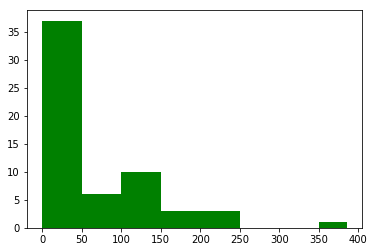

In [41]:
plt.hist(man_index['similarity'],bins=[0,50,100,150,200,250,300,350,385],color='green')

### Putting the information on the map

In [42]:
latitude=40.7128
longitude=-74.0060

map_newyork_1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, score in zip(man_index['Latitude'], man_index['Longitude'], man_index['locality'], man_index['similarity']):
    list_name=list(map(str,borough.split()))
    #print(list_name)
    name=' '.join(list_name)
    
    label = '{}, {}'.format(score, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork_1)  
    
map_newyork_1